In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from catboost import *
import shap


In [2]:
df_credit = pd.read_csv('e:\Programming\Samples\pycaret-master\datasets\credit.csv')

In [3]:
df_credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [4]:
df_credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,167876.403333,1.600917,1.850958,1.553000,35.446708,-0.023875,-0.140500,-0.170000,-0.221500,-0.266833,...,43172.528083,40190.249458,38722.892708,5687.489833,5.928435e+03,5227.245458,4766.803417,4774.861792,5280.923917,0.221083
std,129907.454723,0.489720,0.787361,0.521331,9.180845,1.123806,1.194216,1.198712,1.171784,1.133220,...,64075.909188,60385.391344,59259.183390,17011.021882,2.423232e+04,17918.982291,15421.988078,15400.224129,18214.205137,0.414985
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-53007.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2294.000000,1718.500000,1238.000000,1000.000000,8.200000e+02,390.000000,285.000000,239.750000,111.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,18059.500000,16846.000000,2102.500000,2.013000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54837.250000,50320.000000,49327.500000,5011.000000,5.000000e+03,4512.000000,4040.250000,4024.250000,4010.500000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
data = df_credit.columns
data

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [6]:
X = df_credit.drop('default', axis=1)
y = np.array(df_credit.default)

In [7]:
y

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [8]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1)

In [9]:
model = CatBoostClassifier()
model.fit(X_train, y_train)

aining: 18.5s
613:	learn: 0.3645391	total: 29.3s	remaining: 18.4s
614:	learn: 0.3644210	total: 29.4s	remaining: 18.4s
615:	learn: 0.3643780	total: 29.5s	remaining: 18.4s
616:	learn: 0.3643366	total: 29.6s	remaining: 18.3s
617:	learn: 0.3642408	total: 29.6s	remaining: 18.3s
618:	learn: 0.3641839	total: 29.6s	remaining: 18.2s
619:	learn: 0.3641069	total: 29.7s	remaining: 18.2s
620:	learn: 0.3639607	total: 29.7s	remaining: 18.1s
621:	learn: 0.3638270	total: 29.8s	remaining: 18.1s
622:	learn: 0.3637687	total: 29.8s	remaining: 18s
623:	learn: 0.3637237	total: 29.9s	remaining: 18s
624:	learn: 0.3636882	total: 29.9s	remaining: 17.9s
625:	learn: 0.3635884	total: 29.9s	remaining: 17.9s
626:	learn: 0.3635049	total: 30s	remaining: 17.9s
627:	learn: 0.3633754	total: 30.1s	remaining: 17.8s
628:	learn: 0.3632883	total: 30.1s	remaining: 17.8s
629:	learn: 0.3631946	total: 30.2s	remaining: 17.7s
630:	learn: 0.3631421	total: 30.3s	remaining: 17.7s
631:	learn: 0.3630441	total: 30.4s	remaining: 17.7s
632:

In [10]:
print('Resulting tree count:', model.tree_count_)

Resulting tree count: 1000


In [11]:
from catboost import Pool

In [13]:
shap_values = model.get_feature_importance(Pool(X, y), type='ShapValues')
shap_values

array([[ 0.346706  , -0.02799737,  0.01334533, ...,  0.08799108,
         0.0430035 , -1.62485616],
       [ 0.06888698, -0.04841002,  0.03504692, ..., -0.02380556,
         0.02560799, -1.62485616],
       [ 0.40456878, -0.05704457,  0.02913279, ..., -0.02361782,
        -0.04342461, -1.62485616],
       ...,
       [ 0.15408558,  0.06601371,  0.02563851, ...,  0.02421832,
        -0.04244525, -1.62485616],
       [ 0.34853252,  0.12856073,  0.06339633, ...,  0.30714315,
         0.05860336, -1.62485616],
       [ 0.39688889,  0.08957659,  0.03002722, ..., -0.02345721,
        -0.03194403, -1.62485616]])

In [14]:
prediction = model.predict(X_validation)
prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [15]:
from sklearn.metrics import mean_squared_error

In [26]:
print(100 - mean_squared_error(y_validation, prediction), '%')

99.81666666666666 %


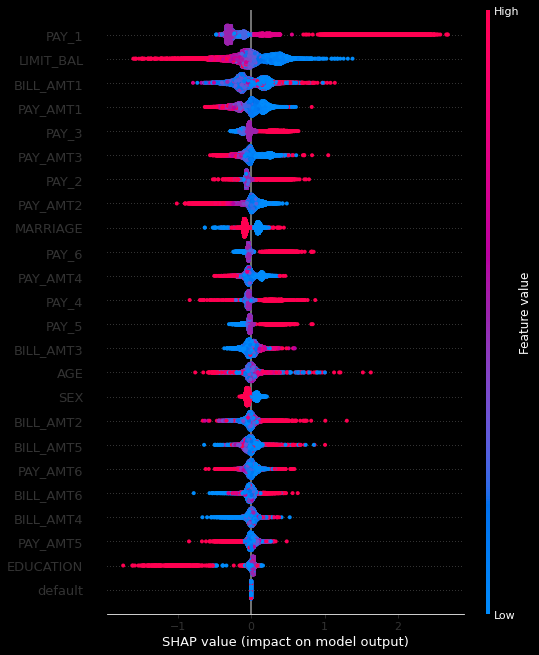

In [27]:
shap_test = shap.TreeExplainer(model).shap_values(df_credit)
shap.summary_plot(shap_test, df_credit, max_display=25, auto_size_plot=True)

In [32]:
model.save_model('E:/programming/save_files/model_CatBoost_credit.py', format='python', pool=X_train)model.save_model('E:/programming/save_files/model_CatBoost_credit.py', format='python', pool=X_train)